In [64]:
""" Importing dependencies """

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import pymongo
import preprocessor as p
import sentiment_analysis

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [65]:
"""
    Connecting to mongodb
"""

DATABASE = "twitter_database"
DISTWISE_COL = "distwise_collection"

client = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = client[DATABASE]
distwise_col = mydb[DISTWISE_COL]

""" Stop words """
stopwords = set(STOPWORDS)

In [66]:
red_tweets = []
orange_tweets = []
green_tweets = []

for tweet in distwise_col.find():
    if tweet["Zone"] == "Red":
        red_tweets.append(tweet["full_text"])
        
    if tweet["Zone"] == "Orange":
        orange_tweets.append(tweet["full_text"])
        
    if tweet["Zone"] == "Green":
        green_tweets.append(tweet["full_text"])

In [67]:
print(len(red_tweets), len(green_tweets), len(orange_tweets))

47112 43657 73569


In [68]:
red_zone_sentiment = sentiment_analysis.get_sentiment(red_tweets)
orange_zone_sentiment = sentiment_analysis.get_sentiment(orange_tweets)
green_zone_sentiment = sentiment_analysis.get_sentiment(green_tweets)

print(red_zone_sentiment)
print(orange_zone_sentiment)
print(green_zone_sentiment)

['1.67', '72.34', '23.85', '2.15']
['1.45', '73.82', '22.27', '2.46']
['1.62', '72.19', '23.72', '2.47']


In [69]:
def create_graph(sizes, colors, labels, zone):
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title("Sentiment distribution of tweets in "+zone+" zones")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    #plt.savefig("../results/sentiment_analysis_"+zone+"_zone.png")

In [70]:
labels = ['Strongly Negative', 'Slightly Negative', 'Slightly Positive', 'Strongly Positive']
colors = ['red', 'pink', 'lightskyblue', 'blue']

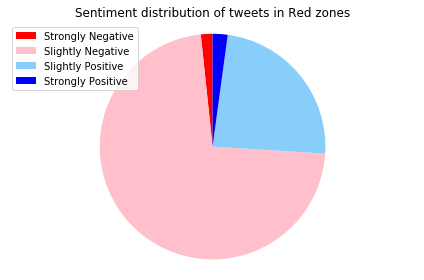

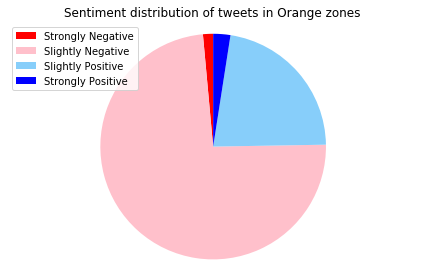

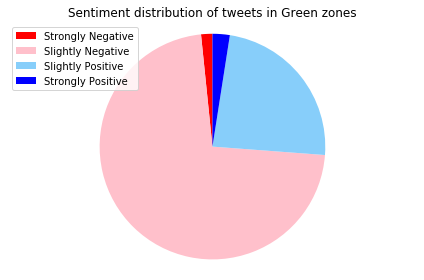

In [71]:
create_graph(red_zone_sentiment, colors, labels, "Red")
create_graph(orange_zone_sentiment, colors, labels, "Orange")
create_graph(green_zone_sentiment, colors, labels, "Green")

In [72]:
def create_wordcloud(zone, word_list):
    wordcloud = WordCloud(width = 1000, height = 1000, 
                    stopwords = stopwords, 
                    background_color = 'black',
                    min_font_size = 10).generate(word_list) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud)  
    plt.show() 
    #plt.savefig('../results/'+zone+'_wordcloud')
    plt.close()

Red Zone


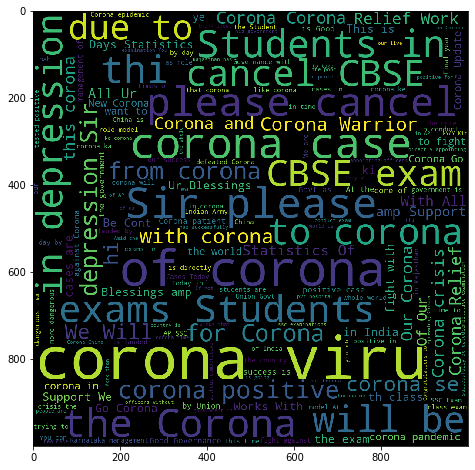

Orange Zone


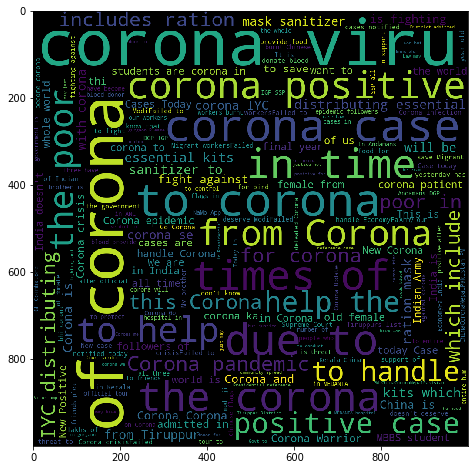

Green Zone


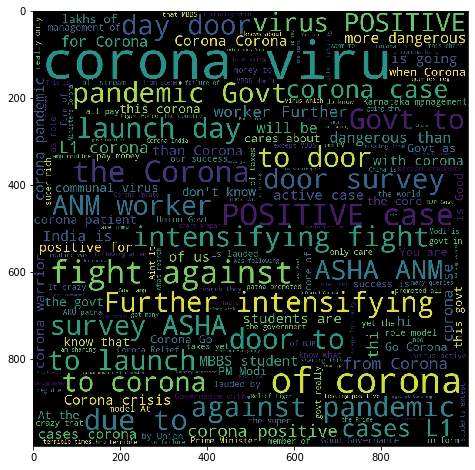

In [73]:
""" Word cloud generation """

print("Red Zone")
text = ""
for tweet in red_tweets:
    text = text + " " + p.clean(tweet)
        
create_wordcloud("red", text)

print("Orange Zone")
text = ""
for tweet in orange_tweets:
    text = text + " " + p.clean(tweet)
        
create_wordcloud("orange", text)

print("Green Zone")
text = ""
for tweet in green_tweets:
    text = text + " " + p.clean(tweet)
        
create_wordcloud("green", text)